In [16]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


# Homework 9

The first part is a simple review of ROC curves.

The second part asks you to perform a K-nn regression on faces

## 1. ROC curves

1. Find the best value of $K$ (optimizing the AUC on the iris test data):

In [17]:
iris = datasets.load_iris()
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(np.int)
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)



## 2. Face completion 

The goal is to predict the lower half of a face given its upper half.

The first column of images shows true faces. The second column illustrates how  linear
regression completes the lower half of those faces.

Your task is to fill the third column with k nearest neighbors predictions.


In [ ]:
# Load the faces datasets
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  

In [11]:

# Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

ESTIMATORS = {
    "Linear regression": 1,
    "K-nn": 2,
}
# Fit estimators

y_test_predict = dict()
estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_test_predict["Linear regression"] = estimator.predict(X_test)

#The following is a placeholder that you need to change:
y_test_predict["K-nn"] = y_test

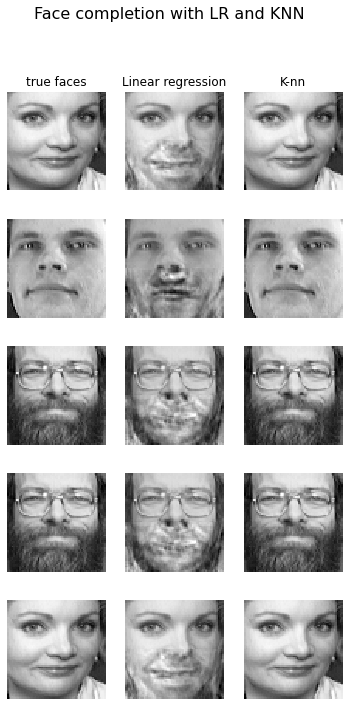

In [12]:
# Plot the completed faces
image_shape = (64, 64)

n_cols = 3
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with LR and KNN", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(ESTIMATORS):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

### Advanced:

Change the code from above to predict the right half from the left half of the face